#  Obama tone to changes?



**Datasource 1:** The [NRC Emotional Lexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing. 

Datasource 2: Speeches from White House https://www.whitehouse.gov/the-press-office/

Datasource 3: Election Speeches taken from the website Presidency. Scraped Obama 2008: http://www.presidency.ucsb.edu/2008_election_speeches.php?candidate=44&campaign=2008OBAMA&doctype=5000

In [176]:
import pandas as pd
%matplotlib inline

# Reading in the EmoLex

I'm just copying this from the other notebook! It's the one at the very bottom that does a lot of reshaping. I think it's the easiest to work with.

In [177]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


## Reading in Obama's election speeches

### Get a list of all of the files

In [178]:
filenames = pd.read_csv("obama_elections.csv")


In [179]:
filenames.head()

,"Address at the National Constitution Center in Philadelphia: ""A More Perfect Union""; March 18, 2008","Address in Berlin at the Victory Column in Tiergarten Park; July 24, 2008","Address in Chicago Accepting Election as the 44th President of the United States; November 4, 2008","Commencement Address at Wesleyan University in Middletown, Connecticut; May 25, 2008","Democratic Radio Address; November 1, 2008","E-mail Message Announcing Selection of Senator Joseph Biden as the 2008 Democratic Vice-Presidential Nominee; August 23, 2008","Excerpt of News Conference; June 25, 2008","Excerpt of Remarks in Sderot, Israel; July 23, 2008","Excerpts of Interview with Charles Gibson of ABC News; October 8, 2008","Informal Exchange with Reporters in Clearwater, Florida; September 24, 2008",...,"Remarks to the National Conference of Black Mayors in Baton Rouge, Louisiana; May 5, 2007","Remarks to the National Council of La Raza in Miami; July 22, 2007","Remarks to the National Education Association Annual Meeting in Philadelphia; July 5, 2007","Remarks to the U.S. Conference of Mayors in Miami, Florida; June 21, 2008","Remarks to the United Auto Workers Conference in Dubuque, Iowa; November 13, 2007","Remarks to the Veterans of Foreign Wars Convention in Orlando, Florida; August 19, 2008","Remarks via Satellite to the 80th Convention of the American Federation of Teachers; July 13, 2008","Remarks with Chris Matthews at the ""Hardball"" College Tour at West Chester University of Pennsylvania; April 2, 2008","Remarks with Senator Hillary Clinton in Unity, New Hampshire; June 27, 2008","Text Message Announcing Selection of Senator Joseph Biden as the 2008 Democratic Vice-Presidential Nominee; August 23, 2008"
0,"March 18, 2008","July 24, 2008","November 4, 2008","May 25, 2008","November 1, 2008","August 23, 2008","June 25, 2008","July 23, 2008","October 8, 2008","September 24, 2008",...,"May 5, 2007","July 22, 2007","July 5, 2007","June 21, 2008","November 13, 2007","August 19, 2008","July 13, 2008","April 2, 2008","June 27, 2008","August 23, 2008"
1,"“We the people, in order to form a more perfec...",Thank you to the citizens of Berlin and to the...,If there is anyone out there who still doubts ...,"Thank you, President Roth, for that generous i...",Good morning. This is Barack Obama.After decad...,(Recipient's First Name)--I have some importan...,joined in progressOBAMA: ...but no matter who ...,"(JOINED IN PROGRESS)... today, Mahmoud Abbas a...","GIBSON: Senator, we're undergoing a global mar...","I wanted to have a chance to talk to you, beca...",...,It is an honor to be here at Southern Universi...,I have been running for President now for a li...,"Over the last few years, I've been traveling t...",This is something of a homecoming for me. Beca...,We meet at a difficult time for organized labo...,"Thank you, Commander Lisicki, for your leaders...","Hello, everybody. I'm sorry I can't join you a...",MATTHEWS: Live from West Chester University ou...,"CLINTON: Hello, Unity! Hello, New Hampshire! W...",Barack has chosen Senator Joe Biden to be our ...
2,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...,http://www.presidency.ucsb.edu/ws/index.php?pi...

In [180]:
speeches_df = filenames.T.reset_index().rename(columns={'index': 'name'})
speeches_df.head()

,name,0,1,2
0,Address at the National Constitution Center in...,"March 18, 2008","“We the people, in order to form a more perfec...",http://www.presidency.ucsb.edu/ws/index.php?pi...
1,Address in Berlin at the Victory Column in Tie...,"July 24, 2008",Thank you to the citizens of Berlin and to the...,http://www.presidency.ucsb.edu/ws/index.php?pi...
2,Address in Chicago Accepting Election as the 4...,"November 4, 2008",If there is anyone out there who still doubts ...,http://www.presidency.ucsb.edu/ws/index.php?pi...
3,Commencement Address at Wesleyan University in...,"May 25, 2008","Thank you, President Roth, for that generous i...",http://www.presidency.ucsb.edu/ws/index.php?pi...
4,"Democratic Radio Address; November 1, 2008","November 1, 2008",Good morning. This is Barack Obama.After decad...,http://www.presidency.ucsb.edu/ws/index.php?pi...


In [181]:
speeches_df.columns = ['name', 'date', 'content', 'filename']
speeches_df.head()

,name,date,content,filename
0,Address at the National Constitution Center in...,"March 18, 2008","“We the people, in order to form a more perfec...",http://www.presidency.ucsb.edu/ws/index.php?pi...
1,Address in Berlin at the Victory Column in Tie...,"July 24, 2008",Thank you to the citizens of Berlin and to the...,http://www.presidency.ucsb.edu/ws/index.php?pi...
2,Address in Chicago Accepting Election as the 4...,"November 4, 2008",If there is anyone out there who still doubts ...,http://www.presidency.ucsb.edu/ws/index.php?pi...
3,Commencement Address at Wesleyan University in...,"May 25, 2008","Thank you, President Roth, for that generous i...",http://www.presidency.ucsb.edu/ws/index.php?pi...
4,"Democratic Radio Address; November 1, 2008","November 1, 2008",Good morning. This is Barack Obama.After decad...,http://www.presidency.ucsb.edu/ws/index.php?pi...


In [182]:
dates = speeches_df['date']
pd.to_datetime(dates)

0     2008-03-18
1     2008-07-24
2     2008-11-04
3     2008-05-25
4     2008-11-01
5     2008-08-23
6     2008-06-25
7     2008-07-23
8     2008-10-08
9     2008-09-24
10    2008-05-28
11    2008-09-04
12    2008-09-08
13    2008-09-09
14    2008-09-10
15    2008-09-25
16    2008-04-27
17    2008-08-16
18    2008-02-02
19    2008-07-13
20    2008-01-27
21    2008-10-23
22    2008-09-21
23    2008-05-05
24    2008-04-21
25    2008-07-22
26    2008-05-05
27    2008-03-15
28    2008-07-20
29    2008-07-15
         ...    
197   2008-09-29
198   2008-05-13
199   2008-06-11
200   2008-04-25
201   2008-07-01
202   2007-05-29
203   2008-05-26
204   2008-01-22
205   2008-04-02
206   2008-04-14
207   2008-06-04
208   2007-05-02
209   2007-04-23
210   2008-09-25
211   2007-07-26
212   2008-09-10
213   2008-05-23
214   2007-05-07
215   2007-06-05
216   2008-06-28
217   2007-05-05
218   2007-07-22
219   2007-07-05
220   2008-06-21
221   2007-11-13
222   2008-08-19
223   2008-07-13
224   2008-04-

# How does Obama before winning the elections sound?

Let's analyze by counting words.

We would use the code below to count all of his words. **Do we really want all of them?**

```python
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(speeches_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()
```

In [183]:
emolex_df['word'].head(3)

0      aback
1     abacus
2    abandon
Name: word, dtype: object

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(speeches_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.001353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
# wordcount_df.sort_values(by='america', ascending=False).head(5)

In [186]:
# wordcount_df[['murder', 'america', 'great', 'prison', 'immigrant']].head(2)

In [187]:
# bad bad bad = 100% negative
# bad bad evil evil = 50% bad + 50% evil = 100% negative
# bad fish evil fish = 25% bad + 25% evil = 50% negative 
# awful % + hate % + bad % + worse % + evil % = negative %

#wordcount_df[['awful', 'hate', 'bad', 'worse', 'evil']].sum(axis=1)

In [188]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [189]:
emolex_df[emolex_df.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
17,abhor,1,0,1,1,0,1,0,0,0,0
18,abhorrent,1,0,1,1,0,1,0,0,0,0
27,abolish,1,0,0,0,0,1,0,0,0,0


In [190]:
# Get your list of angry words
angry_words = emolex_df[emolex_df.anger == 1]['word']
angry_words.head()

3       abandoned
4     abandonment
17          abhor
18      abhorrent
27        abolish
Name: word, dtype: object

In [191]:
wordcount_df[angry_words].head()

,abandoned,abandonment,abhor,abhorrent,abolish,abomination,abuse,accursed,accusation,accused,...,wreck,wrecked,wretch,wring,wrongdoing,wrongful,wrongly,yell,yelp,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
# Only give me the columns of angry words
speeches_df['anger'] = wordcount_df[angry_words].sum(axis=1)
speeches_df.head(3)

,name,date,content,filename,anger
0,Address at the National Constitution Center in...,"March 18, 2008","“We the people, in order to form a more perfec...",http://www.presidency.ucsb.edu/ws/index.php?pi...,0.084622
1,Address in Berlin at the Victory Column in Tie...,"July 24, 2008",Thank you to the citizens of Berlin and to the...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.064953
2,Address in Chicago Accepting Election as the 4...,"November 4, 2008",If there is anyone out there who still doubts ...,http://www.presidency.ucsb.edu/ws/index.php?pi...,0.039171


In [193]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']


# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']
sadness_words.head()

# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']
surprise_words.head()

# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']
#disgust_words.head()

# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']
#anticipation_words.head()

# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']
negative_words.head()


# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']
joy_words.head()

# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']
trust_words.head()


# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']
fear_words.head()



2         abandon
3       abandoned
4     abandonment
13      abduction
17          abhor
Name: word, dtype: object

In [194]:
# Only give me the columns of angry words
speeches_df['positivity'] = wordcount_df[positive_words].sum(axis=1)


speeches_df['joy'] = wordcount_df[joy_words].sum(axis=1)


speeches_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



speeches_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

speeches_df['trust'] = wordcount_df[trust_words].sum(axis=1)


speeches_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


speeches_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)


speeches_df['negative'] = wordcount_df[negative_words].sum(axis=1)


speeches_df['fear'] = wordcount_df[fear_words].sum(axis=1)




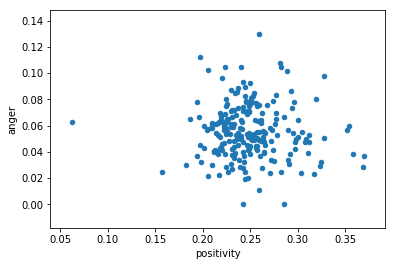

In [195]:
speeches_df.plot(x='positivity', y='anger', kind='scatter')

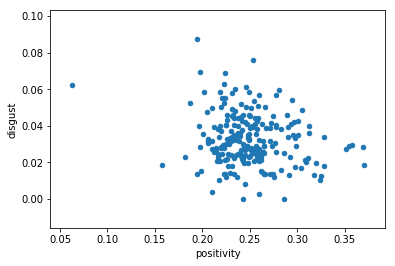

In [196]:
speeches_df.plot(x='positivity', y='disgust', kind='scatter')

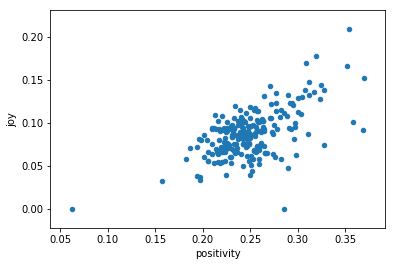

In [197]:
speeches_df.plot(x='positivity', y='joy', kind='scatter')

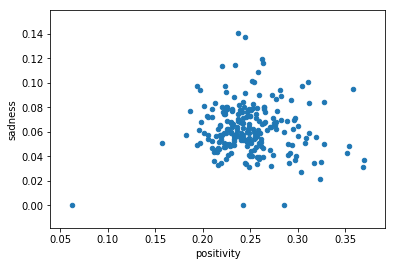

In [198]:
speeches_df.plot(x='positivity', y='sadness', kind='scatter')

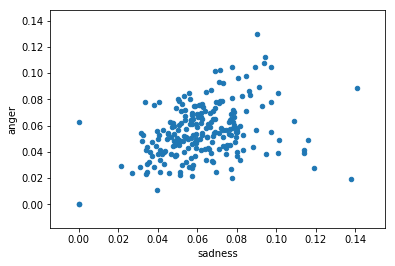

In [199]:
speeches_df.plot(x='sadness', y='anger', kind='scatter')

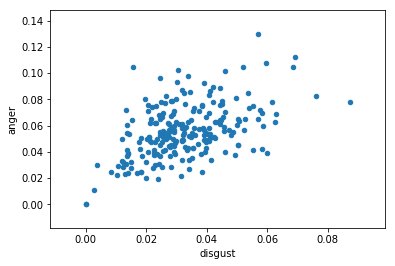

In [200]:
speeches_df.plot(x='disgust', y='anger', kind='scatter')

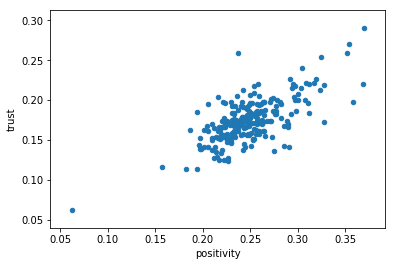

In [201]:
speeches_df.plot(x='positivity', y='trust', kind='scatter')

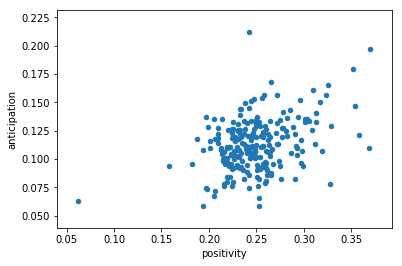

In [202]:
speeches_df.plot(x='positivity', y='anticipation', kind='scatter')

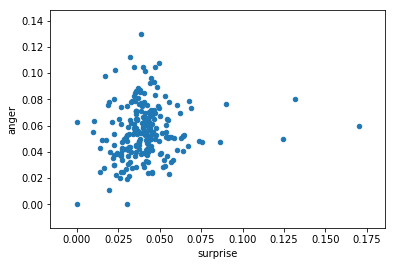

In [203]:
speeches_df.plot(x='surprise', y='anger', kind='scatter')

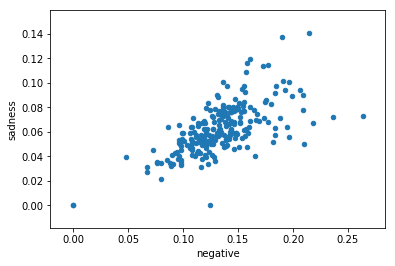

In [204]:
speeches_df.plot(x='negative', y='sadness', kind='scatter')

# Reading in the Obama speeches



In [251]:


df= pd.read_csv("obamasp_presidency.csv", nrows = 3000, na_values = ["False"])
df = df.head(30000)
df.head(5)

,actual_president_guess,content,date,president,title,url
0,True,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...
1,NaN,as prepared for delivery ladies and gentlemen ...,2017-01-18 10:59:14-05:00,Obama,Remarks by Vice President Joe Biden at the Wor...,https://obamawhitehouse.archives.gov/the-press...
2,NaN,world economic forum davos switzerland the vic...,2017-01-17 06:04:00-05:00,Obama,Remarks by Vice President Joe Biden on The Can...,https://obamawhitehouse.archives.gov/the-press...
3,NaN,bankova kyiv ukraine the vice president mr pre...,2017-01-17 06:00:00-05:00,Obama,Remarks by Vice President Joe Biden With Ukrai...,https://obamawhitehouse.archives.gov/the-press...
4,True,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...


In [252]:
df.head()

,actual_president_guess,content,date,president,title,url
0,True,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...
1,NaN,as prepared for delivery ladies and gentlemen ...,2017-01-18 10:59:14-05:00,Obama,Remarks by Vice President Joe Biden at the Wor...,https://obamawhitehouse.archives.gov/the-press...
2,NaN,world economic forum davos switzerland the vic...,2017-01-17 06:04:00-05:00,Obama,Remarks by Vice President Joe Biden on The Can...,https://obamawhitehouse.archives.gov/the-press...
3,NaN,bankova kyiv ukraine the vice president mr pre...,2017-01-17 06:00:00-05:00,Obama,Remarks by Vice President Joe Biden With Ukrai...,https://obamawhitehouse.archives.gov/the-press...
4,True,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...


In [253]:
president_speeches_df = df.dropna()

In [254]:
president_speeches_df.columns = ['nothing', 'content', 'date', 'president', 'filename', 'url']
president_speeches_df.head()

,nothing,content,date,president,filename,url
0,True,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...
4,True,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...
5,True,washington dc this week president obama delive...,2017-01-13 23:08:53-05:00,Obama,Weekly Address: The Honor of Serving You as Pr...,https://obamawhitehouse.archives.gov/the-press...
6,True,state dining room p m est the president hey al...,2017-01-12 18:27:00-05:00,Obama,Remarks by the President and the Vice Presiden...,https://obamawhitehouse.archives.gov/the-press...
9,True,mccormick place chicago illinois p m cst the p...,2017-01-10 23:55:00-05:00,Obama,Remarks by the President in Farewell Address |...,https://obamawhitehouse.archives.gov/the-press...


In [255]:
day = president_speeches_df['date'].str.extract('(\d\d\d\d-\d\d?-\d\d)')
president_speeches_df['day'] = president_speeches_df['date'].str.extract('(\d\d\d\d-\d\d?-\d\d)')
president_speeches_df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nothing,content,date,president,filename,url,day
0,True,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...,2017-01-18
4,True,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...,2017-01-16
5,True,washington dc this week president obama delive...,2017-01-13 23:08:53-05:00,Obama,Weekly Address: The Honor of Serving You as Pr...,https://obamawhitehouse.archives.gov/the-press...,2017-01-13
6,True,state dining room p m est the president hey al...,2017-01-12 18:27:00-05:00,Obama,Remarks by the President and the Vice Presiden...,https://obamawhitehouse.archives.gov/the-press...,2017-01-12
9,True,mccormick place chicago illinois p m cst the p...,2017-01-10 23:55:00-05:00,Obama,Remarks by the President in Farewell Address |...,https://obamawhitehouse.archives.gov/the-press...,2017-01-10


In [256]:
day.head()


0    2017-01-18
4    2017-01-16
5    2017-01-13
6    2017-01-12
9    2017-01-10
Name: date, dtype: object

In [257]:
president_speeches_df.drop('nothing', axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [258]:
president_speeches_df.head()

,content,date,president,filename,url,day
0,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...,2017-01-18
4,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...,2017-01-16
5,washington dc this week president obama delive...,2017-01-13 23:08:53-05:00,Obama,Weekly Address: The Honor of Serving You as Pr...,https://obamawhitehouse.archives.gov/the-press...,2017-01-13
6,state dining room p m est the president hey al...,2017-01-12 18:27:00-05:00,Obama,Remarks by the President and the Vice Presiden...,https://obamawhitehouse.archives.gov/the-press...,2017-01-12
9,mccormick place chicago illinois p m cst the p...,2017-01-10 23:55:00-05:00,Obama,Remarks by the President in Farewell Address |...,https://obamawhitehouse.archives.gov/the-press...,2017-01-10


In [274]:
president_speeches_df = president_speeches_df.head(221)

### Add a column for the name 

We don't have a name for these, so we'll just use the filename.

# How do Obama speeches before and after the elections sound?

Let's analyze by counting words.

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(president_speeches_df['content'])
vocab = vec.get_feature_names()
president_speeches_df_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
president_speeches_df_wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']

# Only give me the columns of angry words
president_speeches_df['positivity'] = president_speeches_df_wordcount_df[positive_words].sum(axis=1)
president_speeches_df.head(3)

,content,date,president,filename,url,day,positivity,anger,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...,2017-01-18,0.308870,0.053606,0.089343,0.025526,0.052967,0.209955,0.112317,0.056796,0.097001,0.066369
4,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...,2017-01-16,0.355715,0.071942,0.193445,0.031175,0.128697,0.267786,0.115108,0.053557,0.127898,0.103118
5,washington dc this week president obama delive...,2017-01-13 23:08:53-05:00,Obama,Weekly Address: The Honor of Serving You as Pr...,https://obamawhitehouse.archives.gov/the-press...,2017-01-13,0.275862,0.000000,0.034483,0.000000,0.034483,0.172414,0.103448,0.000000,0.017241,0.034483


In [277]:
# Get your list of positive words
anger_words = emolex_df[emolex_df.anger == 1]['word']

# Only give me the columns of angry words
president_speeches_df['anger'] = president_speeches_df_wordcount_df[anger_words].sum(axis=1)
president_speeches_df.head(3)

,content,date,president,filename,url,day,positivity,anger,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,james s brady press briefing room p m est the ...,2017-01-18 17:36:00-05:00,Obama,Remarks by the President in Final Press Confer...,https://obamawhitehouse.archives.gov/the-press...,2017-01-18,0.308870,0.053606,0.089343,0.025526,0.052967,0.209955,0.112317,0.056796,0.097001,0.066369
4,east room p m est the president they said this...,2017-01-16 19:08:00-05:00,Obama,Remarks by the President Honoring the World Se...,https://obamawhitehouse.archives.gov/the-press...,2017-01-16,0.355715,0.071942,0.193445,0.031175,0.128697,0.267786,0.115108,0.053557,0.127898,0.103118
5,washington dc this week president obama delive...,2017-01-13 23:08:53-05:00,Obama,Weekly Address: The Honor of Serving You as Pr...,https://obamawhitehouse.archives.gov/the-press...,2017-01-13,0.275862,0.000000,0.034483,0.000000,0.034483,0.172414,0.103448,0.000000,0.017241,0.034483


In [278]:
# Only give me the columns of angry words
#president_speeches_df['positivity'] = president_speeches_df_wordcount_df[positive_words].sum(axis=1)


president_speeches_df['joy'] = president_speeches_df_wordcount_df[joy_words].sum(axis=1)


president_speeches_df['disgust'] = president_speeches_df_wordcount_df[disgust_words].sum(axis=1)



president_speeches_df['surprise'] = president_speeches_df_wordcount_df[surprise_words].sum(axis=1)

president_speeches_df['trust'] = president_speeches_df_wordcount_df[trust_words].sum(axis=1)


president_speeches_df['anticipation'] = president_speeches_df_wordcount_df[anticipation_words].sum(axis=1)


president_speeches_df['sadness'] = president_speeches_df_wordcount_df[sadness_words].sum(axis=1)


president_speeches_df['negative'] = president_speeches_df_wordcount_df[negative_words].sum(axis=1)


president_speeches_df['fear'] = president_speeches_df_wordcount_df[fear_words].sum(axis=1)




# Comparing Election vs Presidency

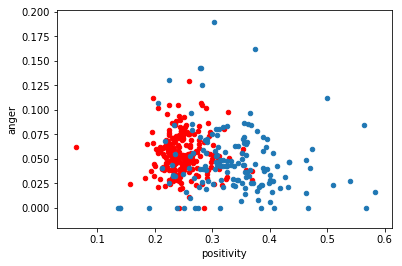

In [291]:
ax = speeches_df.plot(x='positivity', y= 'anger',c='red', kind='scatter')
president_speeches_df.plot(x='positivity', y= 'anger', kind='scatter', ax=ax)

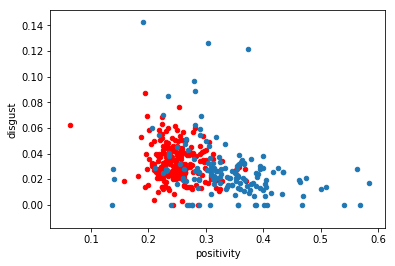

In [292]:
ax = speeches_df.plot(x='positivity', y='disgust', c='red', kind='scatter')
president_speeches_df.plot(x='positivity', y='disgust', kind='scatter', ax=ax)

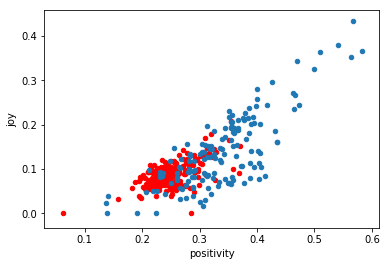

In [293]:
ax = speeches_df.plot(x='positivity', y='joy',c='red', kind='scatter')
president_speeches_df.plot(x='positivity', y='joy', kind='scatter', ax=ax)

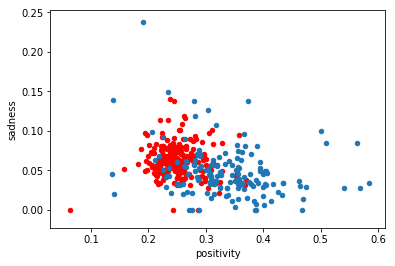

In [294]:
ax = speeches_df.plot(x='positivity', y='sadness',c='red', kind='scatter')
president_speeches_df.plot(x='positivity', y='sadness', kind='scatter', ax=ax)

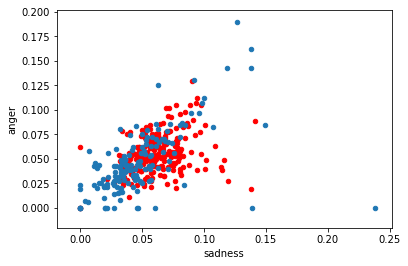

In [295]:
ax = speeches_df.plot(x='sadness', y='anger', c='red', kind='scatter')
president_speeches_df.plot(x='sadness', y='anger', kind='scatter', ax=ax)

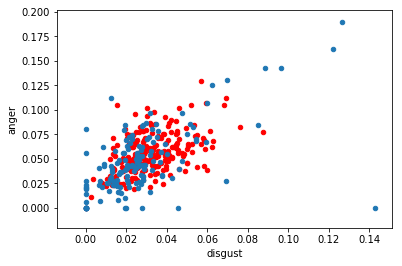

In [296]:
ax = speeches_df.plot(x='disgust', y='anger',c='red', kind='scatter')
president_speeches_df.plot(x='disgust', y='anger', kind='scatter', ax=ax)

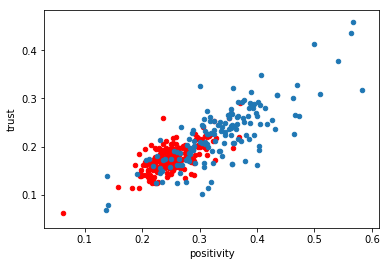

In [297]:
ax = speeches_df.plot(x='positivity', y='trust',c='red', kind='scatter')
president_speeches_df.plot(x='positivity', y='trust', kind='scatter', ax=ax)

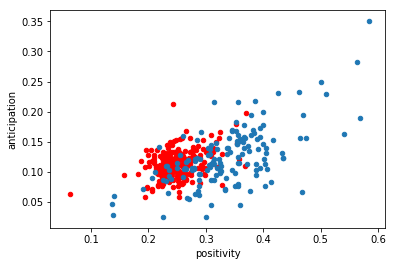

In [298]:
ax = speeches_df.plot(x='positivity', y='anticipation',c='red', kind='scatter')
president_speeches_df.plot(x='positivity', y='anticipation', kind='scatter', ax=ax)

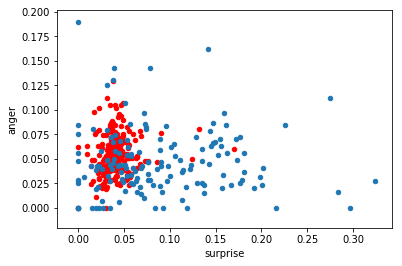

In [299]:
ax = speeches_df.plot(x='surprise', y='anger',c='red', kind='scatter')
president_speeches_df.plot(x='surprise', y='anger', kind='scatter', ax=ax)

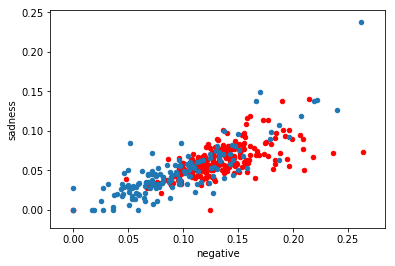

In [300]:
ax = speeches_df.plot(x='negative', y='sadness', c='red', kind='scatter')
president_speeches_df.plot(x='negative', y='sadness', kind='scatter', ax=ax)

In [301]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(speeches[0])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
wordcount_df.sum().sort_values(ascending=False).head(50)

KeyError: 0

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(speeches[0])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
president_speeches_df_wordcount_df.sum().sort_values(ascending=False).head(50)